In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import plotly.express as px


from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score

# Model Select
from sklearn.model_selection import train_test_split

# Scaling Data
from sklearn import preprocessing

# Import library untuk modeling
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [3]:
df = pd.read_csv('data_penguin.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.shape

(344, 7)

In [5]:
df.select_dtypes(exclude = ['object']).corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [6]:
df.isna().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


In [8]:
from sklearn.impute import SimpleImputer
#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median
df.iloc[:,:] = imputer.fit_transform(df)

In [9]:
df.isna().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [10]:
df.drop(['island'], inplace = True, axis = 1)

In [11]:
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,41.1,17.0,190.0,3800.0,MALE
4,Adelie,36.7,19.3,193.0,3450.0,FEMALE


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_col = ['species', 'sex']
df[label_col] = df[label_col].apply(le.fit_transform)
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.1,18.7,181.0,3750.0,2
1,0,39.5,17.4,186.0,3800.0,1
2,0,40.3,18.0,195.0,3250.0,1
3,0,41.1,17.0,190.0,3800.0,2
4,0,36.7,19.3,193.0,3450.0,1


In [17]:
df.species.unique()

array([0, 1, 2])

In [18]:
X = df.drop('species', axis = 1)
y = df['species']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print('Jumlah X_train: ', len(X_train))
print('Jumlah y_train: ', len(y_train))
print('Jumlah X_test: ', len(X_test))
print('Jumlah y_test: ', len(y_test))

Jumlah X_train:  240
Jumlah y_train:  240
Jumlah X_test:  104
Jumlah y_test:  104


In [20]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

Akurasi dari algoritma Random Forest adalah  0.9903846153846154


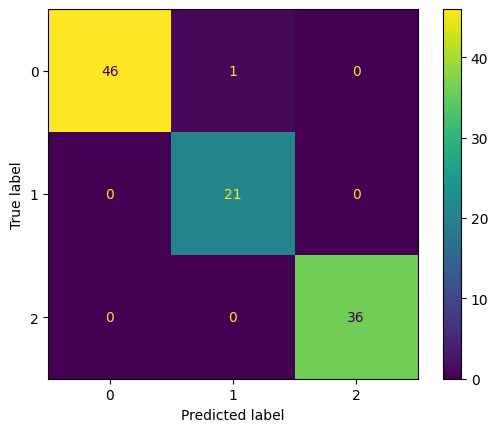

In [21]:
# Random Forest
#Predict the values for test data
rf_pred = model.predict(X_test)
#Default score for Classification model is accuracy. So, it will show the accuracy.
print("Akurasi dari algoritma Random Forest adalah ", model.score(X_test, y_test))

# We will plot the confusion Matrix for better view of our results.
CM_RF = confusion_matrix(y_test, rf_pred)
ConfusionMatrixDisplay(CM_RF).plot()


In [22]:
import joblib

In [23]:
joblib.dump(model, 'penguins_model.pkl')

['penguins_model.pkl']